
Technicians:
  Technician 6:
    Skill: Overhead
    Start Location: (4, 9)
    Working Hours: (0, 480)

  Technician 7:
    Skill: Distribution
    Start Location: (6, 2)
    Working Hours: (0, 480)

  Technician 8:
    Skill: Overhead
    Start Location: (1, 6)
    Working Hours: (0, 480)

  Technician 9:
    Skill: Distribution
    Start Location: (7, 7)
    Working Hours: (0, 480)

Faults:
  Fault 0:
    Required Skill: Overhead
    Location: (1, 1)
    Time Window: (0, 480)
    Expected Duration: 60 minutes

  Fault 1:
    Required Skill: Distribution
    Location: (2, -1)
    Time Window: (0, 480)
    Expected Duration: 120 minutes

  Fault 2:
    Required Skill: Overhead
    Location: (3, 3)
    Time Window: (0, 480)
    Expected Duration: 90 minutes

  Fault 3:
    Required Skill: Distribution
    Location: (6, 0)
    Time Window: (0, 480)
    Expected Duration: 30 minutes

  Fault 4:
    Required Skill: Overhead
    Location: (7, 8)
    Time Window: (0, 480)
    Expected Dura

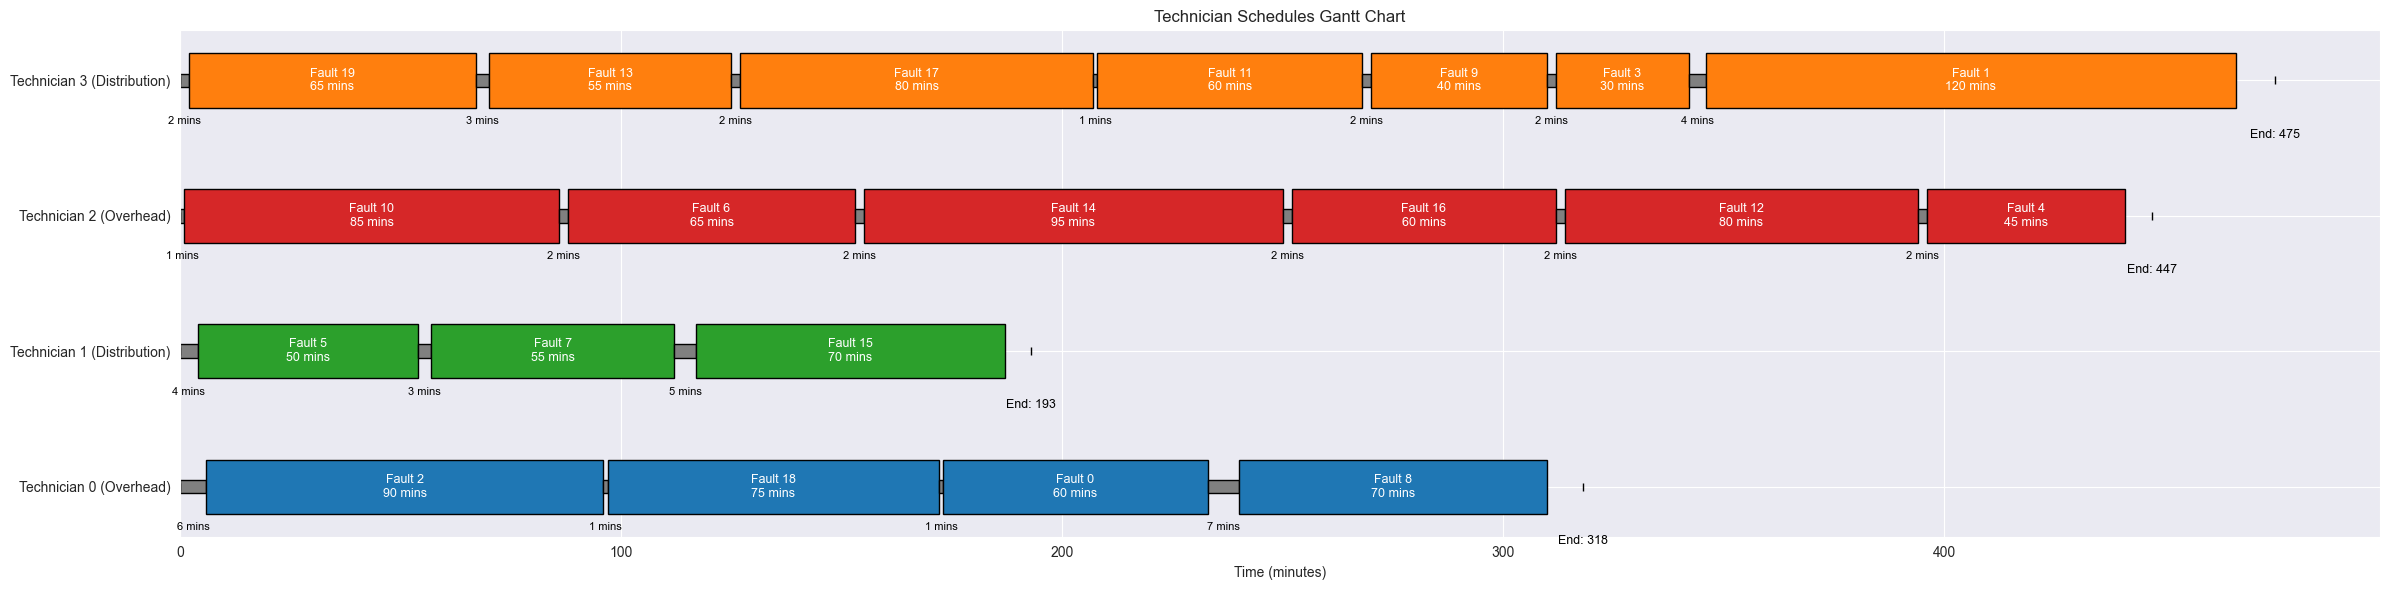

In [23]:
# Import necessary libraries
import matplotlib.pyplot as plt
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp

def create_data_model():
    """Creates the data for the example and prints it."""
    data = {}

    # Technicians
    data['technicians'] = [
        {'id': 6, 'skill': 'Overhead', 'start_location': (4, 9)},
        {'id': 7, 'skill': 'Distribution', 'start_location': (6, 2)},
        {'id': 8, 'skill': 'Overhead', 'start_location': (1, 6)},
        {'id': 9, 'skill': 'Distribution', 'start_location': (7, 7)},
    ]
    data['num_technicians'] = len(data['technicians'])
    
    # Faults
    data['faults'] = [
        {'id': 0, 'skill_required': 'Overhead', 'location': (1, 1), 'time_window': (0, 480), 'duration': 60},
        {'id': 1, 'skill_required': 'Distribution', 'location': (2, -1), 'time_window': (0, 480), 'duration': 120},
        {'id': 2, 'skill_required': 'Overhead', 'location': (3, 3), 'time_window': (0, 480), 'duration': 90},
        {'id': 3, 'skill_required': 'Distribution', 'location': (6, 0), 'time_window': (0, 480), 'duration': 30},
        {'id': 4, 'skill_required': 'Overhead', 'location': (7, 8), 'time_window': (0, 480), 'duration': 45},
        {'id': 5, 'skill_required': 'Distribution', 'location': (4, 6), 'time_window': (0, 480), 'duration': 50},
        {'id': 6, 'skill_required': 'Overhead', 'location': (1, 7), 'time_window': (0, 480), 'duration': 65},
        {'id': 7, 'skill_required': 'Distribution', 'location': (3, 9), 'time_window': (0, 480), 'duration': 55},
        {'id': 8, 'skill_required': 'Overhead', 'location': (8, 1), 'time_window': (0, 480), 'duration': 70},
        {'id': 9, 'skill_required': 'Distribution', 'location': (5, 2), 'time_window': (0, 480), 'duration': 40},
        {'id': 10, 'skill_required': 'Overhead', 'location': (2, 5), 'time_window': (0, 480), 'duration': 85},
        {'id': 11, 'skill_required': 'Distribution', 'location': (7, 4), 'time_window': (0, 480), 'duration': 60},
        {'id': 12, 'skill_required': 'Overhead', 'location': (6, 6), 'time_window': (0, 480), 'duration': 80},
        {'id': 13, 'skill_required': 'Distribution', 'location': (9, 7), 'time_window': (0, 480), 'duration': 55},
        {'id': 14, 'skill_required': 'Overhead', 'location': (3, 8), 'time_window': (0, 480), 'duration': 95},
        {'id': 15, 'skill_required': 'Distribution', 'location': (0, 4), 'time_window': (0, 480), 'duration': 70},
        {'id': 16, 'skill_required': 'Overhead', 'location': (5, 8), 'time_window': (0, 480), 'duration': 60},
        {'id': 17, 'skill_required': 'Distribution', 'location': (8, 5), 'time_window': (0, 480), 'duration': 80},
        {'id': 18, 'skill_required': 'Overhead', 'location': (2, 2), 'time_window': (0, 480), 'duration': 75},
        {'id': 19, 'skill_required': 'Distribution', 'location': (6, 9), 'time_window': (0, 480), 'duration': 65},
    ]

    data['num_faults'] = len(data['faults'])

    # Locations: Technicians' starting points + Faults' locations
    data['locations'] = [tech['start_location'] for tech in data['technicians']] + \
                        [fault['location'] for fault in data['faults']]

    data['num_locations'] = len(data['locations'])

    # Distance matrix (using Euclidean distance)
    data['distance_matrix'] = compute_euclidean_distance_matrix(data['locations'])

    # Time matrix (assuming time equals distance)
    data['time_matrix'] = data['distance_matrix']

    # Service times (duration)
    data['service_times'] = [0] * data['num_technicians'] + [fault['duration'] for fault in data['faults']]

    # Time windows
    # Technicians' working hours: (0, 480) minutes
    data['time_windows'] = [(0, 480)] * data['num_locations']
    # Update faults' time windows
    for i, fault in enumerate(data['faults']):
        index = data['num_technicians'] + i
        data['time_windows'][index] = fault['time_window']

    # Skills at each location
    data['skills'] = [tech['skill'] for tech in data['technicians']] + \
                     [fault['skill_required'] for fault in data['faults']]

    # Print the dataset for understanding
    print_problem_data(data)

    return data

def compute_euclidean_distance_matrix(locations):
    """Computes the Euclidean distance matrix."""
    import math
    distances = []
    for from_node in locations:
        row = []
        for to_node in locations:
            distance = math.hypot(from_node[0] - to_node[0], from_node[1] - to_node[1])
            row.append(int(distance))
        distances.append(row)
    return distances

def print_problem_data(data):
    """Prints the technicians, faults, and locations data."""
    print("\nTechnicians:")
    for tech in data['technicians']:
        print(f"  Technician {tech['id']}:")
        print(f"    Skill: {tech['skill']}")
        print(f"    Start Location: {tech['start_location']}")
        print(f"    Working Hours: {data['time_windows'][tech['id']]}")
        print()

    print("Faults:")
    for i, fault in enumerate(data['faults']):
        idx = data['num_technicians'] + i
        print(f"  Fault {fault['id']}:")
        print(f"    Required Skill: {fault['skill_required']}")
        print(f"    Location: {fault['location']}")
        print(f"    Time Window: {data['time_windows'][idx]}")
        print(f"    Expected Duration: {fault['duration']} minutes")
        print()

    print("Locations:")
    for idx, location in enumerate(data['locations']):
        if idx < data['num_technicians']:
            tech_id = idx  # Since technician IDs match their indices in 'technicians' list
            print(f"  Location {idx}: Technician {tech_id} Start Location at {location}")
        else:
            fault_id = idx - data['num_technicians']
            print(f"  Location {idx}: Fault {fault_id} at {location}")
    print()

def main():
    """Solves the technician routing problem and plots the solution."""
    data = create_data_model()

    # Create the routing index manager
    manager = pywrapcp.RoutingIndexManager(
        data['num_locations'],
        data['num_technicians'],
        list(range(data['num_technicians'])),
        list(range(data['num_technicians']))
    )

    # Create Routing Model
    routing = pywrapcp.RoutingModel(manager)

    # Create and register a transit callback (distance as time)
    def time_callback(from_index, to_index):
        """Returns the travel time between the two nodes plus service time at from_node."""
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        travel_time = data['time_matrix'][from_node][to_node]
        service_time = data['service_times'][from_node]
        return travel_time + service_time

    transit_callback_index = routing.RegisterTransitCallback(time_callback)

    # Define cost of each arc
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # Add Time Windows constraint
    routing.AddDimension(
        transit_callback_index,
        480,  # maximum waiting time
        480,  # maximum time per technician
        False,  # Don't force start cumul to zero
        'Time'
    )
    time_dimension = routing.GetDimensionOrDie('Time')

    # Add time window constraints for each location
    for location_idx in range(data['num_locations']):
        index = manager.NodeToIndex(location_idx)
        time_window = data['time_windows'][location_idx]
        time_dimension.CumulVar(index).SetRange(time_window[0], time_window[1])

    # Skill constraints
    # For each fault, specify which technicians can serve it
    for fault_idx in range(data['num_faults']):
        node_index = data['num_technicians'] + fault_idx
        required_skill = data['skills'][node_index]
        allowed_technicians = [t for t in range(data['num_technicians']) if data['skills'][t] == required_skill]
        if allowed_technicians:
            routing.SetAllowedVehiclesForIndex(allowed_technicians, manager.NodeToIndex(node_index))
        else:
            # Fault cannot be served by any technician, add disjunction with high penalty
            routing.AddDisjunction([manager.NodeToIndex(node_index)], 100000)

    # Allow dropping nodes with penalty
    penalty = 10000
    for node in range(data['num_technicians'], data['num_locations']):
        routing.AddDisjunction([manager.NodeToIndex(node)], penalty)

    # Setting first solution heuristic
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.time_limit.seconds = 10
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)
    # Optional: Set a random seed for reproducibility
    search_parameters.solution_limit = 1

    # Solve the problem
    solution = routing.SolveWithParameters(search_parameters)

    # Print solution and plot
    if solution:
        routes = get_routes(solution, routing, manager)
        print_custom_solution(data, manager, routing, solution)
        plot_gantt_chart(data, manager, routing, solution)
    else:
        print('No solution found!')

def get_routes(solution, routing, manager):
    """Get vehicle routes from a solution and store them in an array."""
    routes = []
    for technician_id in range(routing.vehicles()):
        index = routing.Start(technician_id)
        route = []
        while not routing.IsEnd(index):
            node_index = manager.IndexToNode(index)
            route.append(node_index)
            index = solution.Value(routing.NextVar(index))
        routes.append(route)
    return routes

def print_custom_solution(data, manager, routing, solution):
    """Prints the solution in the custom format."""
    print('\nSolution:')
    total_time = 0
    for technician_id in range(data['num_technicians']):
        index = routing.Start(technician_id)
        skill = data['skills'][technician_id]
        plan_output = f"Technician {technician_id} (Skill: {skill}):\n"
        route_time = 0
        prev_departure_time = 0
        while not routing.IsEnd(index):
            node_index = manager.IndexToNode(index)
            node_coord = data['locations'][node_index]
            time_var = routing.GetDimensionOrDie('Time').CumulVar(index)
            arrival_time = solution.Min(time_var)
            service_time = data['service_times'][node_index]
            departure_time = arrival_time + service_time
            if node_index < data['num_technicians']:
                location_type = 'Start'
                plan_output += f"  Start at Location {node_index} {str(node_coord):<20} (Arrival: {arrival_time}, Departure: {departure_time})\n"
            else:
                fault_id = node_index - data['num_technicians']
                location_type = f"Fault at Location {node_index} {node_coord}"
                plan_output += f"  Fault at Location {node_index} {str(node_coord)} ~{service_time}mins (Arrival: {arrival_time}, Departure: {departure_time})\n"
            previous_index = index
            index = solution.Value(routing.NextVar(index))
            if not routing.IsEnd(index):
                # Get the travel time from previous node to current node
                travel_time = routing.GetArcCostForVehicle(previous_index, index, technician_id)
                # Subtract service time at from_node to get actual travel time
                actual_travel_time = travel_time - data['service_times'][manager.IndexToNode(previous_index)]
                next_node_index = manager.IndexToNode(index)
                next_node_coord = data['locations'][next_node_index]
                plan_output += f"    Travel to Location {next_node_index} {str(next_node_coord):<20} (Travel Time: {actual_travel_time})\n"
            else:
                # Arrival time back at depot
                travel_time = routing.GetArcCostForVehicle(previous_index, index, technician_id)
                actual_travel_time = travel_time - data['service_times'][manager.IndexToNode(previous_index)]
                arrival_time = departure_time + actual_travel_time
                plan_output += f"  End at Location {manager.IndexToNode(index)} (Arrival: {arrival_time})\n"
            route_time = departure_time
        plan_output += f"Total time: {route_time} minutes\n"
        print(plan_output)
        total_time += route_time
    print(f"Total time of all routes: {total_time} minutes")

def plot_gantt_chart(data, manager, routing, solution):
    """Plots a Gantt chart of the technicians' schedules with travel and service amounts."""
    import matplotlib.pyplot as plt

    fig, ax = plt.subplots(figsize=(24, 6))
    colors = ['tab:blue', 'tab:green', 'tab:red', 'tab:orange', 'tab:purple', 'tab:cyan', 'tab:pink', 'tab:olive']

    yticks = []
    ytick_labels = []
    for technician_id in range(data['num_technicians']):
        index = routing.Start(technician_id)
        skill = data['skills'][technician_id]
        technician_name = f"Technician {technician_id} ({skill})"
        color = colors[technician_id % len(colors)]
        yticks.append(technician_id)
        ytick_labels.append(technician_name)
        schedule = []
        previous_index = index
        actual_travel_time = 0  # Initialize
        while not routing.IsEnd(index):
            node_index = manager.IndexToNode(index)
            time_var = routing.GetDimensionOrDie('Time').CumulVar(index)
            arrival_time = solution.Min(time_var)
            service_time = data['service_times'][node_index]
            departure_time = arrival_time + service_time
            if node_index >= data['num_technicians']:
                fault_id = node_index - data['num_technicians']
                # Add service time block
                ax.barh(technician_id, service_time, left=arrival_time, height=0.4, align='center', color=color, edgecolor='black')
                # Label with service amount
                ax.text(arrival_time + service_time / 2, technician_id, f"Fault {fault_id}\n{service_time} mins", va='center', ha='center', color='white', fontsize=9)
            previous_index = index
            index = solution.Value(routing.NextVar(index))
            if not routing.IsEnd(index):
                # Compute travel time to next node
                travel_time = routing.GetArcCostForVehicle(previous_index, index, technician_id)
                actual_travel_time = travel_time - data['service_times'][manager.IndexToNode(previous_index)]
                # Add travel time block
                ax.barh(technician_id, actual_travel_time, left=departure_time, height=0.1, align='center', color='gray', edgecolor='black')
                # Adjusted label position to avoid overlapping
                ax.text(departure_time + actual_travel_time / 2, technician_id - 0.30, f"{actual_travel_time} mins", va='center', ha='center', color='black', fontsize=8)
            else:
                # Compute travel time back to depot
                travel_time = routing.GetArcCostForVehicle(previous_index, index, technician_id)
                actual_travel_time = travel_time - data['service_times'][manager.IndexToNode(previous_index)]
                # Calculate end time
                end_time = departure_time + actual_travel_time
                # Add end time marker
                ax.plot([end_time], [technician_id], marker='|', color='black')
                # Add end time label
                ax.text(end_time, technician_id - 0.4, f"End: {int(end_time)}", va='center', ha='center', color='black', fontsize=9)
        ax.plot([0], [technician_id], marker='|', color='black')  # Start marker
    ax.set_yticks(yticks)
    ax.set_yticklabels(ytick_labels)
    ax.set_xlabel('Time (minutes)')
    ax.set_title('Technician Schedules Gantt Chart')
    ax.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    main()
